In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tools_problem2 import create_se_image, create_fse_images

In [3]:
# Load data
brain_maps = h5py.File('../data/brain_maps.mat')

t1map = np.array(brain_maps['T1map'])
t2map = np.array(brain_maps['T2map'])
m0map = np.array(brain_maps['M0map'])

In [ ]:
# PD weighted SE
te = 15
tr = 4000
result = np.abs(create_se_image(t1map, t2map, m0map, te, tr))

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(result, cmap='gray')
plt.title(f'PD weighted\nTE={te}ms, TR={tr}ms')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(m0map, cmap='gray')
plt.colorbar(orientation='horizontal', pad=0.02)
plt.title('Proton Density')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# T1 weighted SE
te = 15
tr = 500
result = np.abs(create_se_image(t1map, t2map, m0map, te, tr))

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(result, cmap='gray')
plt.title(f'T1 weighted\nTE={te}ms, TR={tr}ms')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(t1map, cmap='gray')
plt.colorbar(orientation='horizontal', pad=0.02)
plt.title('T1')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#%% T2 weighted SE
te = 100
tr = 6000
result = np.abs(create_se_image(t1map, t2map, m0map, te, tr))

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(result, cmap='gray')
plt.title(f'T2 weighted\nTE={te}ms, TR={tr}ms')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(t2map, cmap='gray')
plt.colorbar(orientation='horizontal', pad=0.02)
plt.title('T2')
plt.axis('off')

plt.tight_layout()
plt.show()

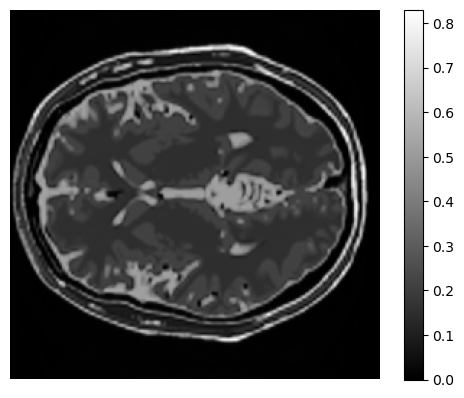

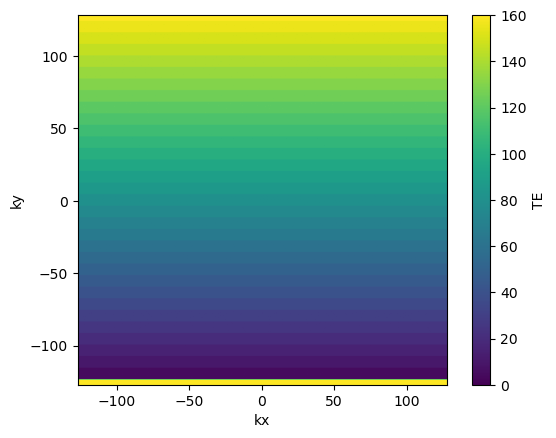

In [54]:
# FSE
tr = 3000
esp = 5
etl = 32
te_eff = 80

result = create_fse_images(t1map, t2map, m0map, esp, tr, etl)

fts = np.zeros_like(result, dtype=complex)

for ii in range(etl):
    fts[..., ii] = np.fft.fftshift(np.fft.fft2(result[..., ii]))
    
final_kpace = np.zeros_like(t1map, dtype=complex)
te = np.zeros_like(t1map)

for ii in range(etl):

    k1 = int(ii*256/etl)
    k2 = int((ii+1)*256/etl)

    final_kpace[k1:k2] = fts[k1:k2, :, ii]
    te[k1:k2] = (ii+1)*esp

offset = int((((etl/2-te_eff/esp)%etl)+1/2)*256/etl)

final_kpace = np.roll(final_kpace, offset, axis=(0, 1))
te = np.roll(te, offset, axis=(0, 1))
plt.imshow(np.abs(np.fft.ifft2(final_kpace)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

plt.imshow(te, vmin=0, vmax=etl*esp, origin='lower', extent=(-127, 128, -127, 128))
plt.colorbar(label='TE')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

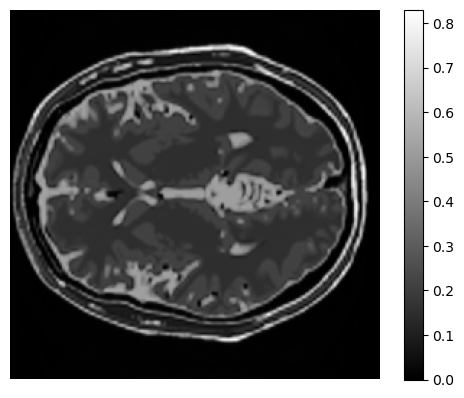

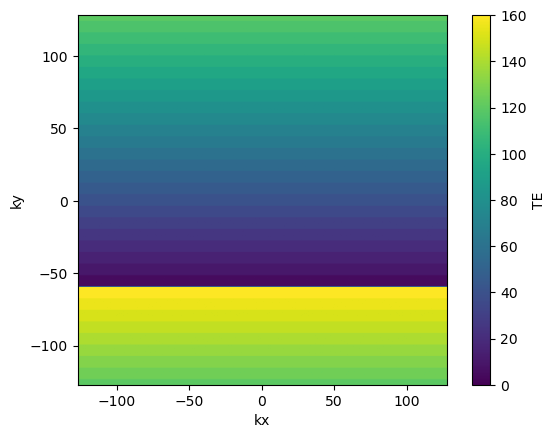

In [56]:
# FSE
tr = 3000
esp = 5
etl = 32
te_eff = 40

result = create_fse_images(t1map, t2map, m0map, esp, tr, etl)

fts = np.zeros_like(result, dtype=complex)

for ii in range(etl):
    fts[..., ii] = np.fft.fftshift(np.fft.fft2(result[..., ii]))
    
final_kpace = np.zeros_like(t1map, dtype=complex)
te = np.zeros_like(t1map)

for ii in range(etl):

    k1 = int(ii*256/etl)
    k2 = int((ii+1)*256/etl)

    final_kpace[k1:k2] = fts[k1:k2, :, ii]
    te[k1:k2] = (ii+1)*esp

offset = int((((etl/2-te_eff/esp)%etl)+1/2)*256/etl)

final_kpace = np.roll(final_kpace, offset, axis=(0, 1))
te = np.roll(te, offset, axis=(0, 1))
plt.imshow(np.abs(np.fft.ifft2(final_kpace)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

plt.imshow(te, vmin=0, vmax=etl*esp, origin='lower', extent=(-127, 128, -127, 128))
plt.colorbar(label='TE')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

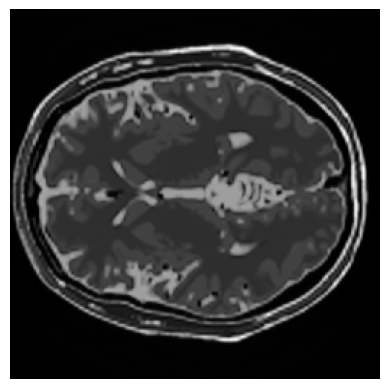

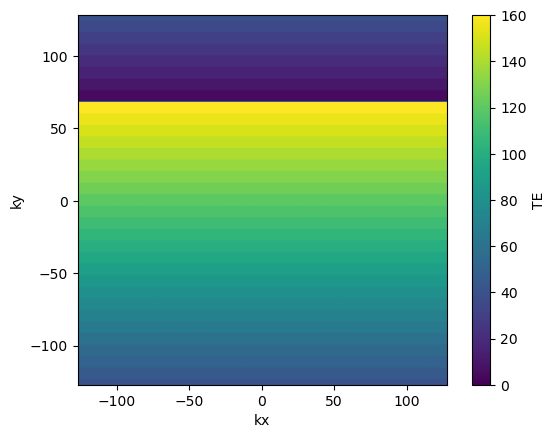

In [55]:
# FSE
tr = 3000
esp = 5
etl = 32
te_eff = 120

result = create_fse_images(t1map, t2map, m0map, esp, tr, etl)

fts = np.zeros_like(result, dtype=complex)

for ii in range(etl):
    fts[..., ii] = np.fft.fftshift(np.fft.fft2(result[..., ii]))
    
final_kpace = np.zeros_like(t1map, dtype=complex)
te = np.zeros_like(t1map)

for ii in range(etl):

    k1 = int(ii*256/etl)
    k2 = int((ii+1)*256/etl)

    final_kpace[k1:k2] = fts[k1:k2, :, ii]
    te[k1:k2] = (ii+1)*esp

offset = int((((etl/2-te_eff/esp)%etl)+1/2)*256/etl)

final_kpace = np.roll(final_kpace, offset, axis=(0, 1))
te = np.roll(te, offset, axis=(0, 1))
plt.imshow(np.abs(np.fft.ifft2(final_kpace)), cmap='gray')

plt.axis('off')
plt.show()

plt.imshow(te, vmin=0, vmax=etl*esp, origin='lower', extent=(-127, 128, -127, 128))
plt.colorbar(label='TE')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()